In [2387]:
from HW1def import *

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Exploration
Descriptions:
- <font color='green'>CLIENTNUM</font>: Unique identifier for the customer holding the account
- <font color='green'>Attrition_Flag</font>: Internal event (customer activity) variable (Existing = 1, Attrited = 0) [<font color='red'>Categorical</font>] [Output]
- <font color='green'>Customer_Age</font>: Customer's Age in Years [<font color='red'>Numerical</font>]
- <font color='green'>Gender</font>: (M = Male, F = Female) [<font color='red'>Categorical</font>]
- <font color='green'>Dependent_Count</font>: Number of dependents [<font color='red'>Numerical</font>]
- <font color='green'>Education_Level</font>: Educational Qualification of the account holder (Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown) [<font color='red'>Categorical</font>]
- <font color='green'>Marital_Status</font>: (Married, Single, Divorced, Unknown) [<font color='red'>Categorical</font>] 
- <font color='green'>Income_Category</font>: Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K) [<font color='red'>Categorical</font>] 
- <font color='green'>Card_Category</font>: Type of Card (Blue, Silver, Gold, Platinum)</font> [<font color='red'>Categorical</font>]
- <font color='green'>Months_on_book</font>: Period of relationship with bank [<font color='red'>Numerical</font>]
- <font color='green'>Total_Relationship_Count</font>: Total no. of products held by the customer [<font color='red'>Numerical</font>]
- <font color='green'>Months_Inactive_12_mon</font>: No. of months inactive in the last 12 months [<font color='red'>Numerical</font>]
- <font color='green'>Contacts_Count_12_mon</font>: No. of Contacts in the last 12 months [<font color='red'>Numerical</font>]
- <font color='green'>Credit_Limit</font>: Credit Limit on the Credit Card [<font color='red'>Numerical</font>]
- <font color='green'>Total_Revolving_Bal</font>: Total Revolving Balance on the Credit Card [<font color='red'>Numerical</font>]
- <font color='green'>Avg_Open_To_Buy</font>: Open to Buy Credit Line (Average of last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Amt_Chng_Q4_Q1</font>: Change in Transaction Amount (Q4 over Q1) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Trans_Amt</font>: Total Transaction Amount (Last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Trans_Ct</font>: Total Transaction Count (Last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Ct_Chng_Q4_Q1</font>: Change in Transaction Count (Q4 over Q1) [<font color='red'>Numerical</font>]
- <font color='green'>Avg_Utilization_Ratio</font>: Average Card Utilization Ratio [<font color='red'>Numerical</font>]

In [2388]:
df = pd.read_csv('HWdata/credit_card_churn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2389]:
df = df.drop(
['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
'CLIENTNUM'], axis=1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [2390]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Sort Columns (Numerical -> Categorical -> Output)

In [2391]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,1:]

In [2392]:
dfNum = df.select_dtypes(include=['int64', 'float64'])

In [2393]:
dfOut = df.iloc[:,0:1]

In [2394]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


# Data Analysis


In [2395]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


In [2396]:
meanByOut = df.groupby(by='Attrition_Flag').mean()
meanByOut

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
0,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
1,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [2397]:
attDf = df[df['Attrition_Flag'] == 0]
attDf

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
21,62,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,F,Graduate,Married,Less than $40K,Blue,0
39,66,0,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,F,Doctorate,Married,Unknown,Blue,0
51,54,1,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,F,Graduate,Married,Less than $40K,Blue,0
54,56,2,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,M,Graduate,Married,$120K +,Blue,0
61,48,2,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,M,Graduate,Married,$60K - $80K,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,55,3,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,F,Uneducated,Single,Unknown,Blue,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


In [2398]:
col_names = attDf.columns
for ind in col_names:
    if attDf[ind].dtype == 'object':
        print(ind)
        print(attDf[ind].value_counts())
        print('----------------')

Gender
F    930
M    697
Name: Gender, dtype: int64
----------------
Education_Level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: Education_Level, dtype: int64
----------------
Marital_Status
Married     709
Single      668
Unknown     129
Divorced    121
Name: Marital_Status, dtype: int64
----------------
Income_Category
Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64
----------------
Card_Category
Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64
----------------


In [2399]:
exiDf = df[df['Attrition_Flag'] == 1]
exiDf

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,46,5,36,1,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,M,College,Single,$80K - $120K,Blue,1
10117,57,2,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,M,Graduate,Married,$80K - $120K,Blue,1
10120,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,M,High School,Single,$60K - $80K,Blue,1
10121,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,F,Graduate,Single,Less than $40K,Blue,1


In [2400]:
col_names = attDf.columns
for ind in col_names:
    if attDf[ind].dtype == 'object':
        print(ind)
        print(attDf[ind].value_counts())
        print('----------------')

Gender
F    930
M    697
Name: Gender, dtype: int64
----------------
Education_Level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: Education_Level, dtype: int64
----------------
Marital_Status
Married     709
Single      668
Unknown     129
Divorced    121
Name: Marital_Status, dtype: int64
----------------
Income_Category
Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64
----------------
Card_Category
Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64
----------------


<AxesSubplot:>

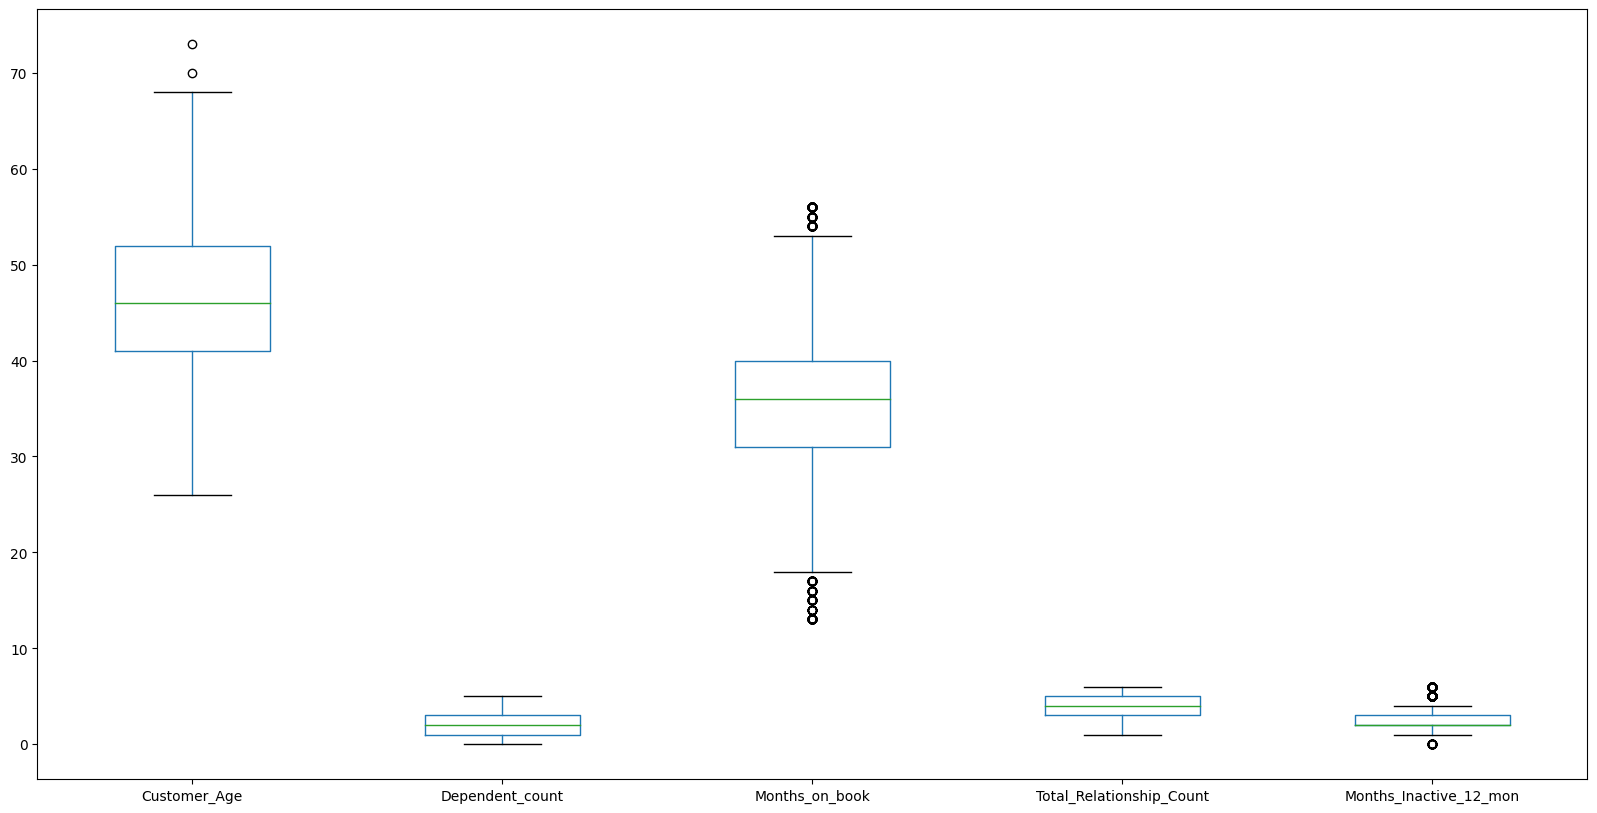

In [2401]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < 5], figsize=(20,10), grid=False)

<AxesSubplot:>

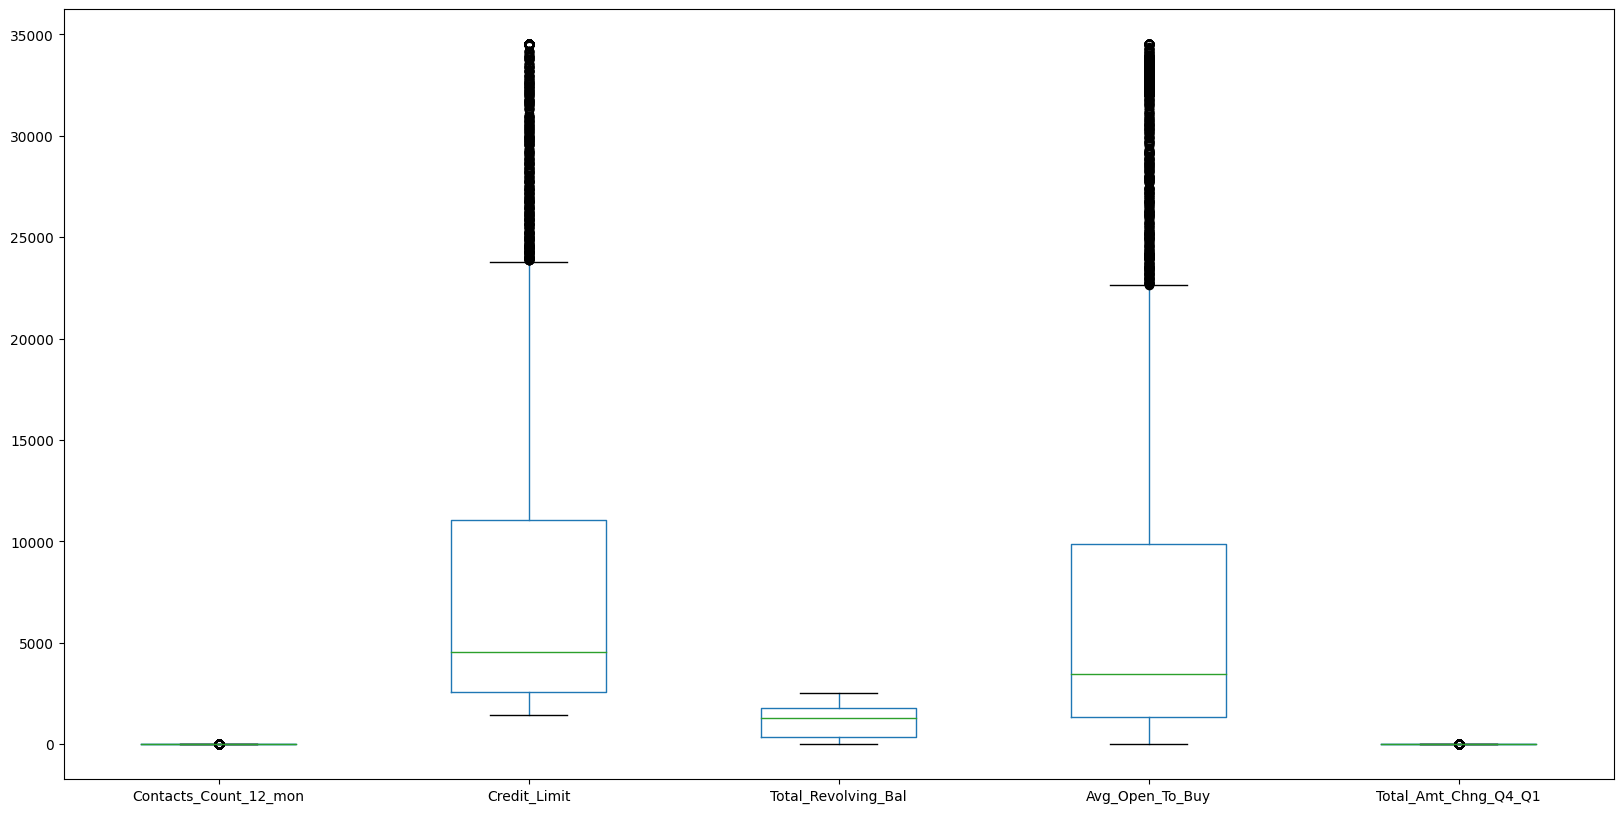

In [2402]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < 10 and count >= 5], figsize=(20,10), grid=False)

<AxesSubplot:>

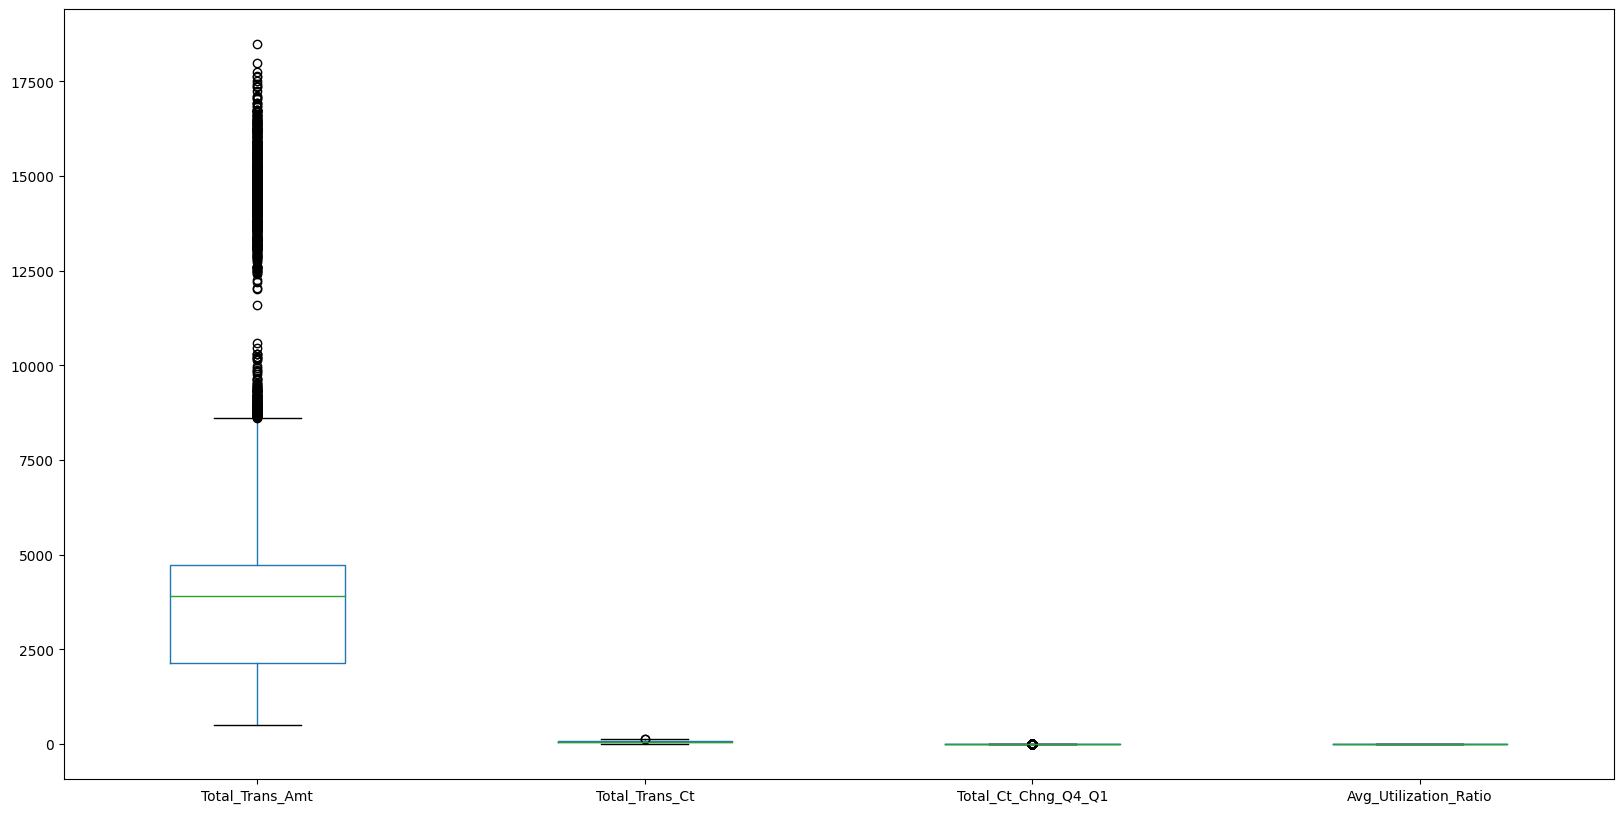

In [2403]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < len(dfNum.columns) and count >= 10], figsize=(20,10), grid=False)

<AxesSubplot:>

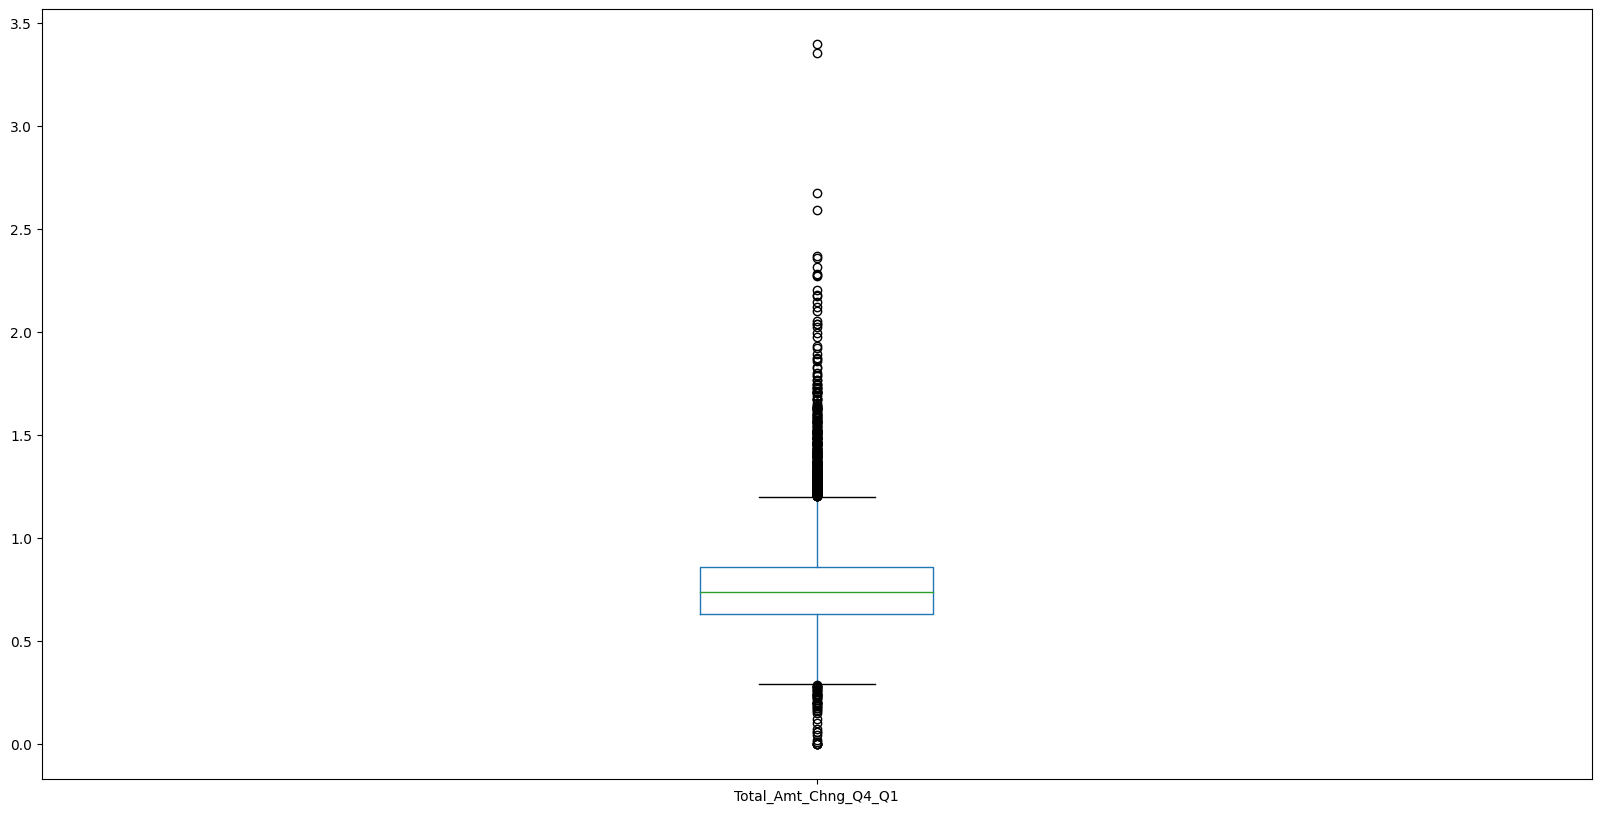

In [2404]:
df.boxplot(column='Total_Amt_Chng_Q4_Q1', figsize=(20,10), grid=False)

## Feature Scaling (Numerical)

In [2405]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

for idx in dfNum.columns:
    if idx not in ['Attrition_Flag']:
        df[idx]=min_max_scaler.fit_transform(df[idx].values.reshape(-1,1))

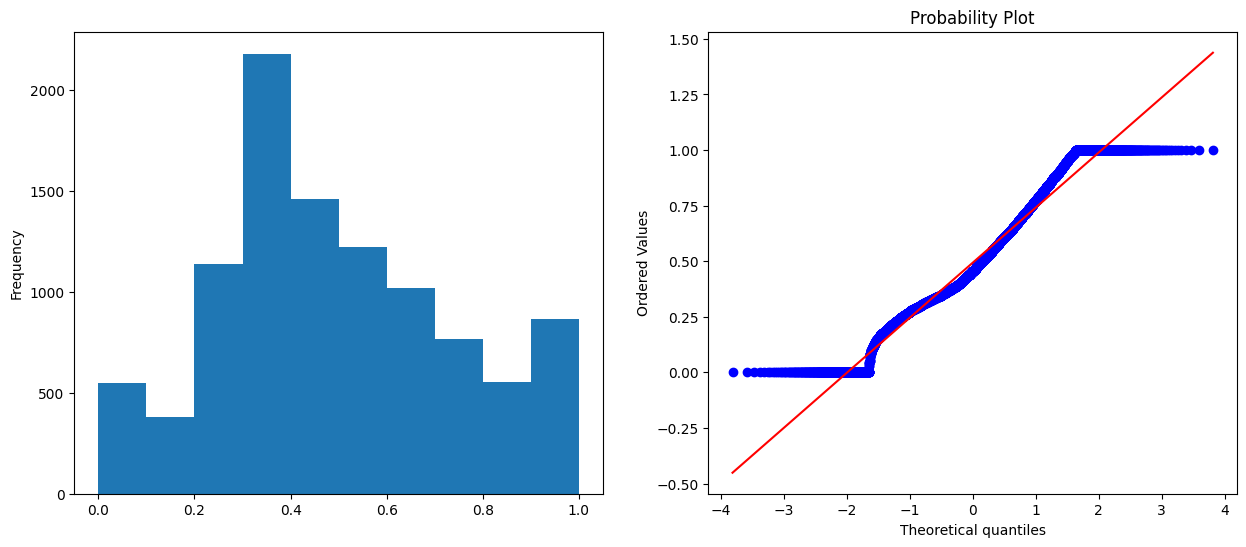

In [2406]:
# df['Credit_Limit']=np.log(df['Credit_Limit']+1)
df['Credit_Limit']=np.cbrt(df['Credit_Limit'])
diagnostic_plots(df,'Credit_Limit')

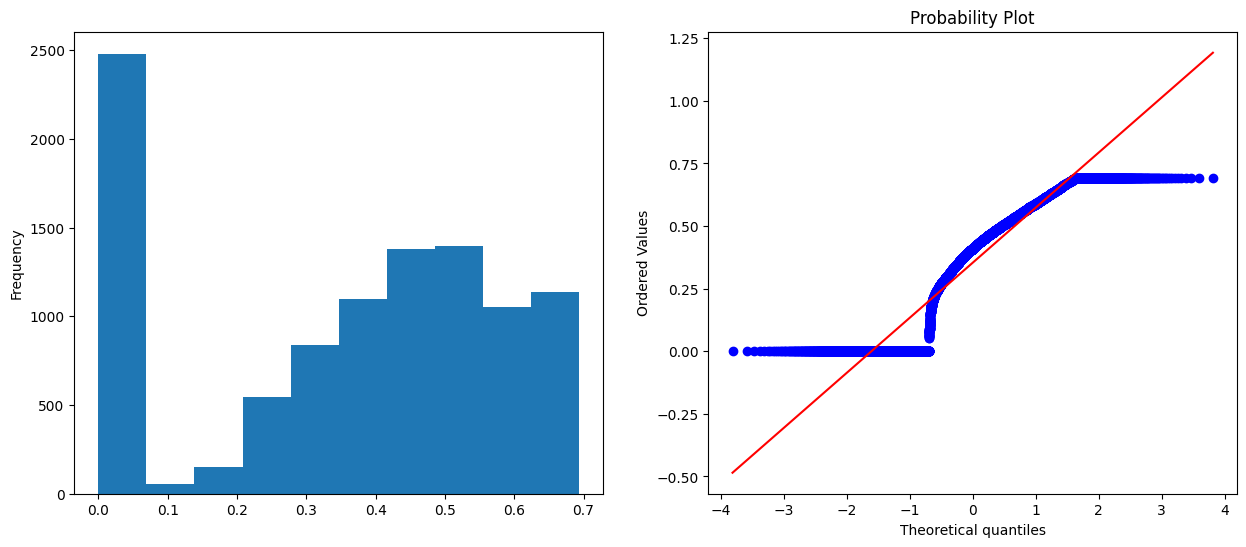

In [2407]:
df['Total_Revolving_Bal']=np.log(df['Total_Revolving_Bal']+1)
diagnostic_plots(df,'Total_Revolving_Bal')

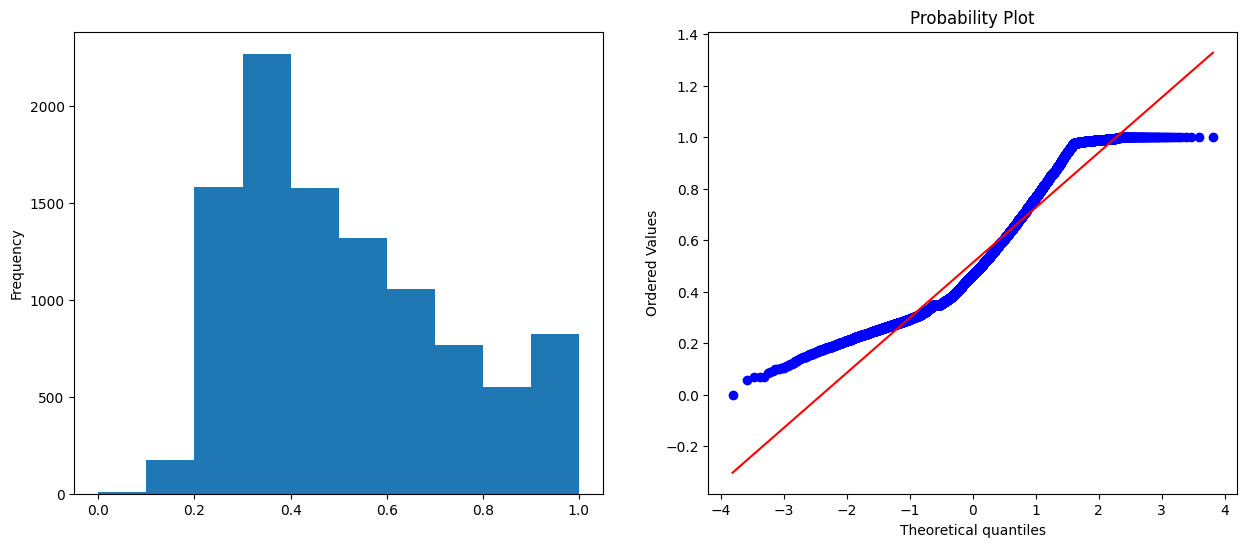

In [2408]:
df['Avg_Open_To_Buy']=np.cbrt(df['Avg_Open_To_Buy'])
diagnostic_plots(df,'Avg_Open_To_Buy')

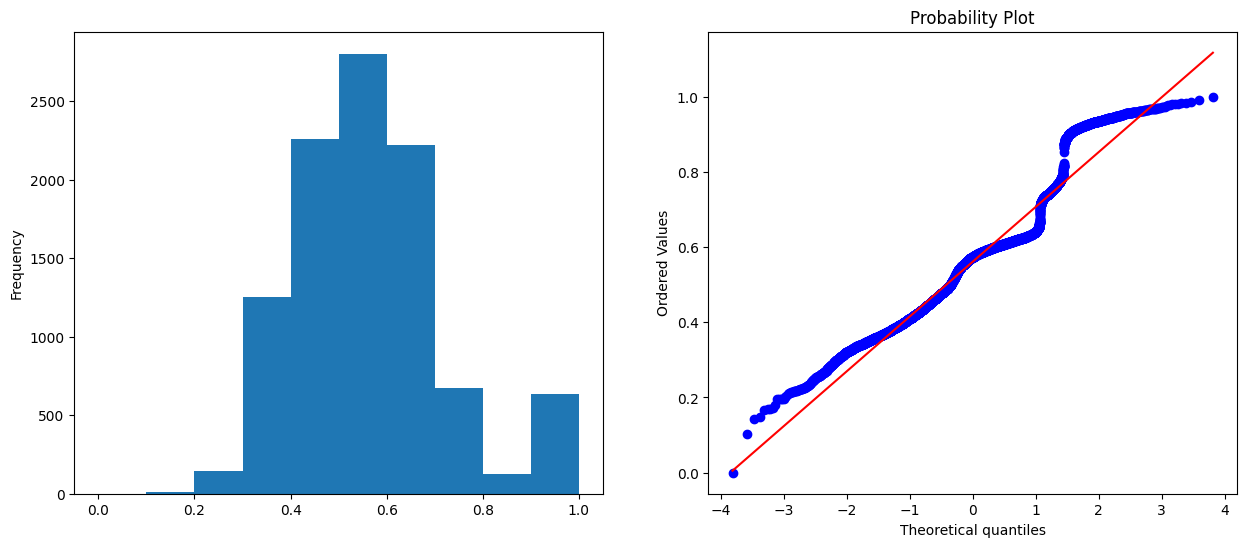

In [2409]:
df['Total_Trans_Amt']=np.cbrt(df['Total_Trans_Amt'])
diagnostic_plots(df,'Total_Trans_Amt')

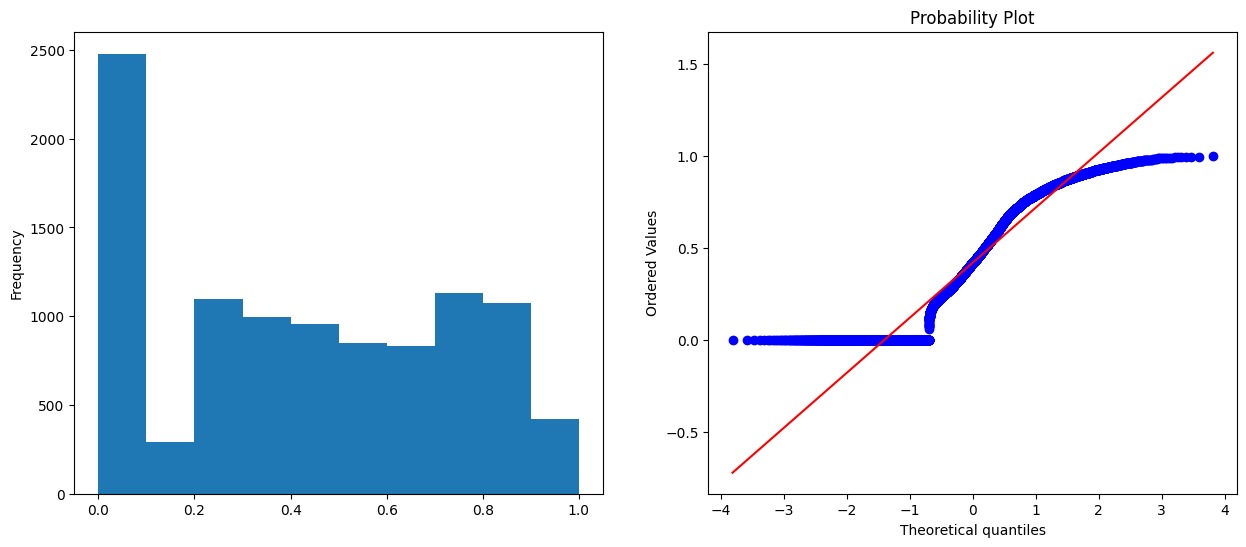

In [2410]:
df['Avg_Utilization_Ratio']=np.sqrt(df['Avg_Utilization_Ratio'])
diagnostic_plots(df,'Avg_Utilization_Ratio')

In [2411]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.432467,0.469241,0.533219,0.562516,0.390195,0.409220,0.493051,0.353506,0.512271,0.223709,0.560993,0.425261,0.191767,0.421134,0.839340
std,0.170571,0.259782,0.185731,0.310882,0.168437,0.184371,0.251323,0.233599,0.220870,0.064530,0.149966,0.181958,0.064105,0.312769,0.367235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319149,0.200000,0.418605,0.400000,0.333333,0.333333,0.323197,0.133332,0.337050,0.185752,0.450697,0.271318,0.156704,0.151733,1.000000
50%,0.425532,0.400000,0.534884,0.600000,0.333333,0.333333,0.454752,0.410090,0.465040,0.216662,0.573424,0.441860,0.189015,0.419733,1.000000
75%,0.553191,0.600000,0.627907,0.800000,0.500000,0.500000,0.662753,0.535780,0.658526,0.252870,0.617447,0.550388,0.220248,0.709580,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.693147,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

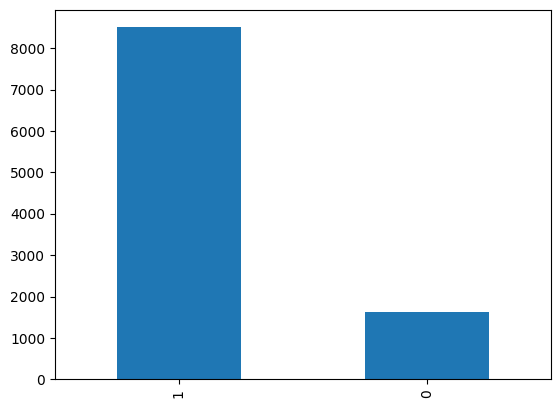

In [2412]:
df['Attrition_Flag'].value_counts().plot.bar()

### Clearing Unknown and Outliers

<AxesSubplot:>

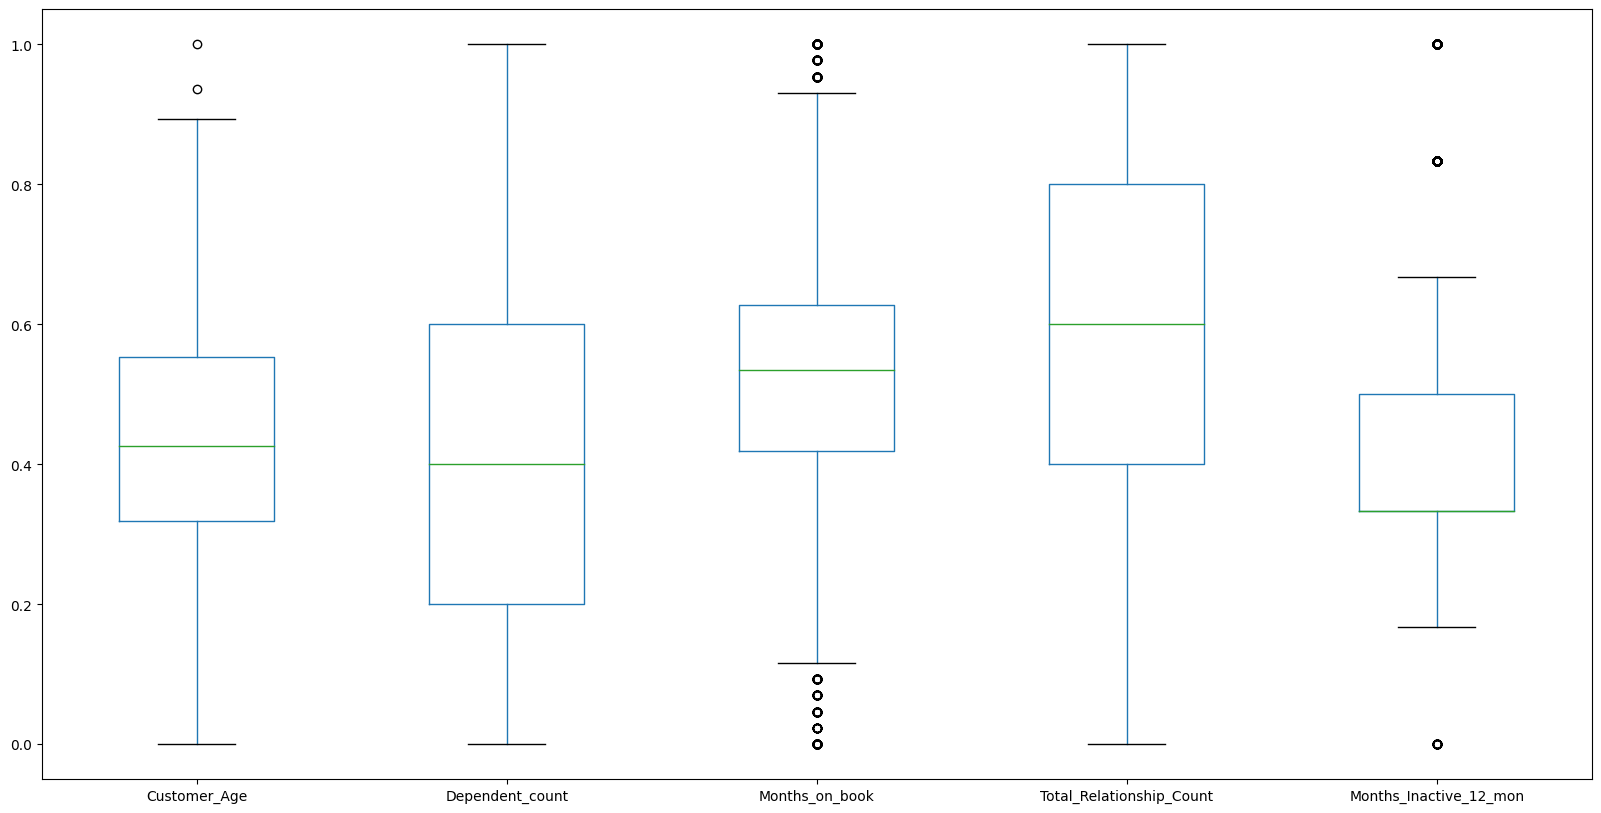

In [2413]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < 5], figsize=(20,10), grid=False)

<AxesSubplot:>

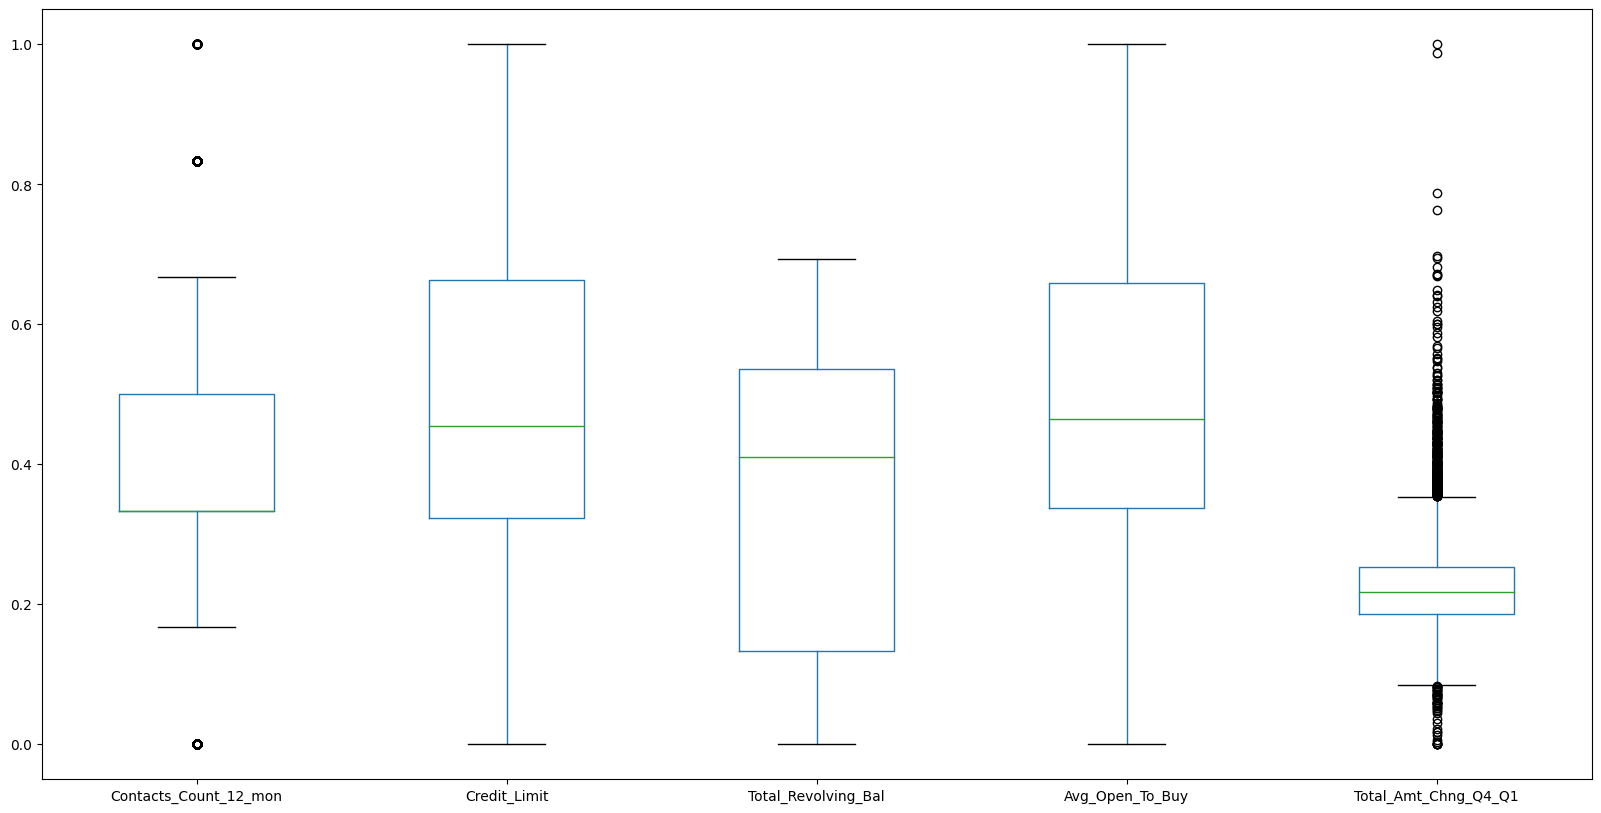

In [2414]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < 10 and count >= 5], figsize=(20,10), grid=False)

<AxesSubplot:>

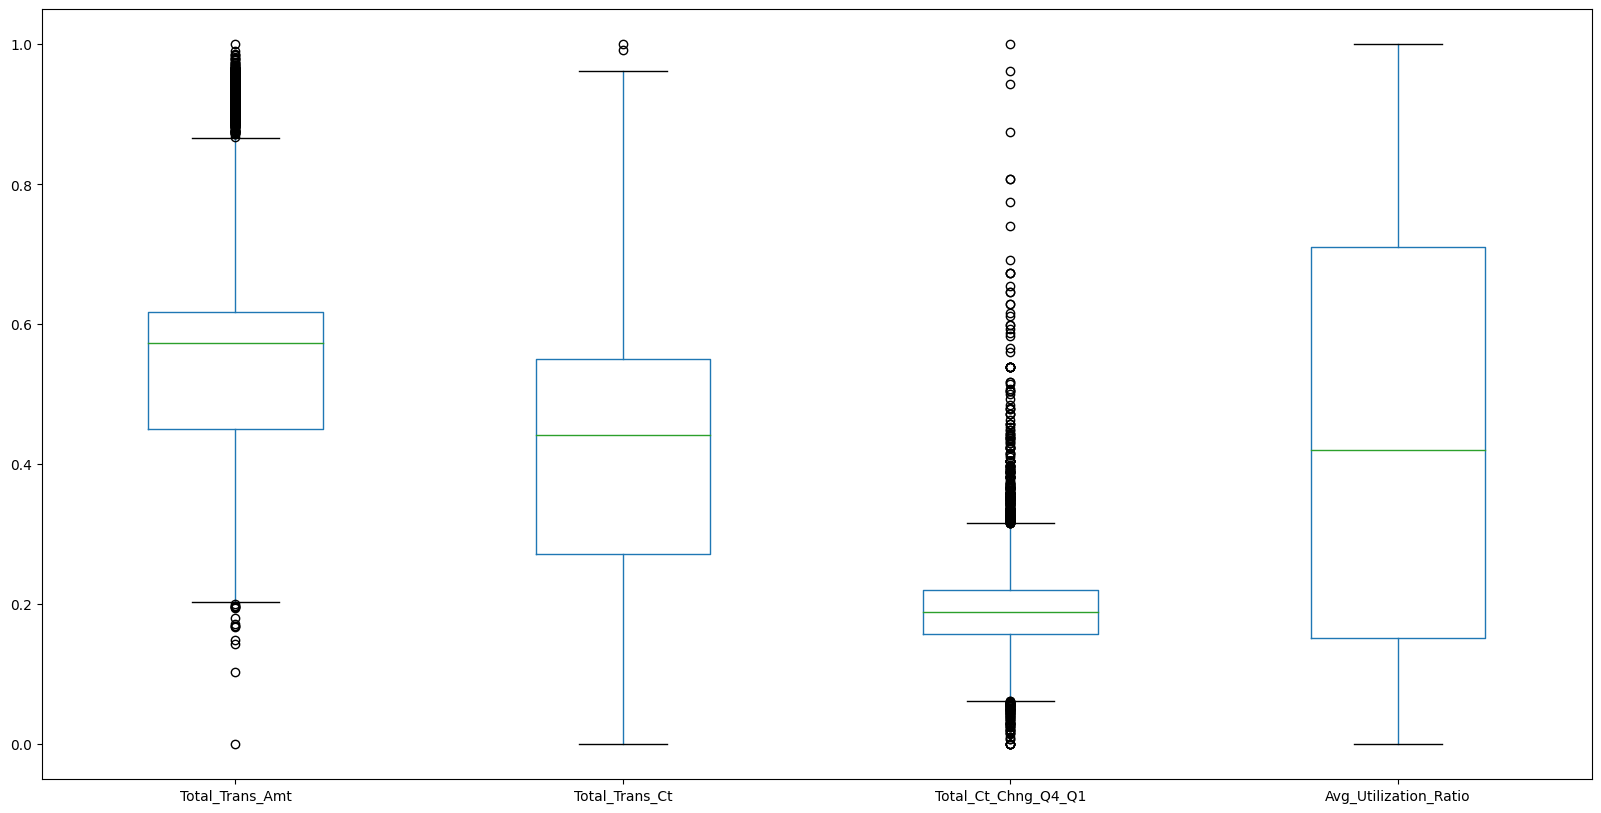

In [2415]:
df.boxplot(column=[str(i) for count, i in enumerate(dfNum.columns) if i != 'Attrition_Flag' and count < len(dfNum.columns) and count >= 10], figsize=(20,10), grid=False)

In [2416]:
df = IQRdrop(df, 'Customer_Age')
df['Customer_Age'].describe()

count    10125.000000
mean         0.432361
std          0.170421
min          0.000000
25%          0.319149
50%          0.425532
75%          0.553191
max          0.893617
Name: Customer_Age, dtype: float64

<AxesSubplot:xlabel='Customer_Age', ylabel='Total_Trans_Amt'>

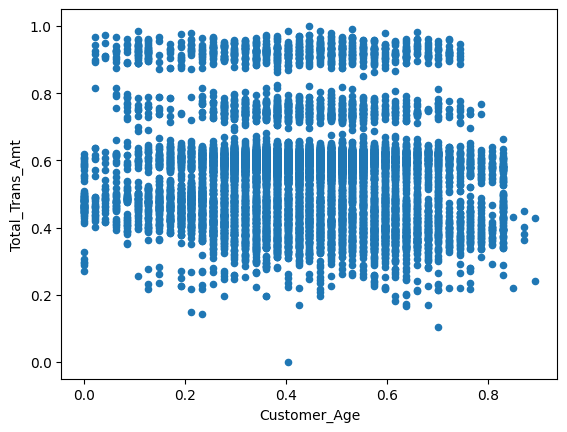

In [2417]:
df.plot.scatter('Customer_Age', 'Total_Trans_Amt')

In [2418]:
# diagnostic_plots(df,'Customer_Age')
# df = IQRdrop(df,'Customer_Age')
# df.columns

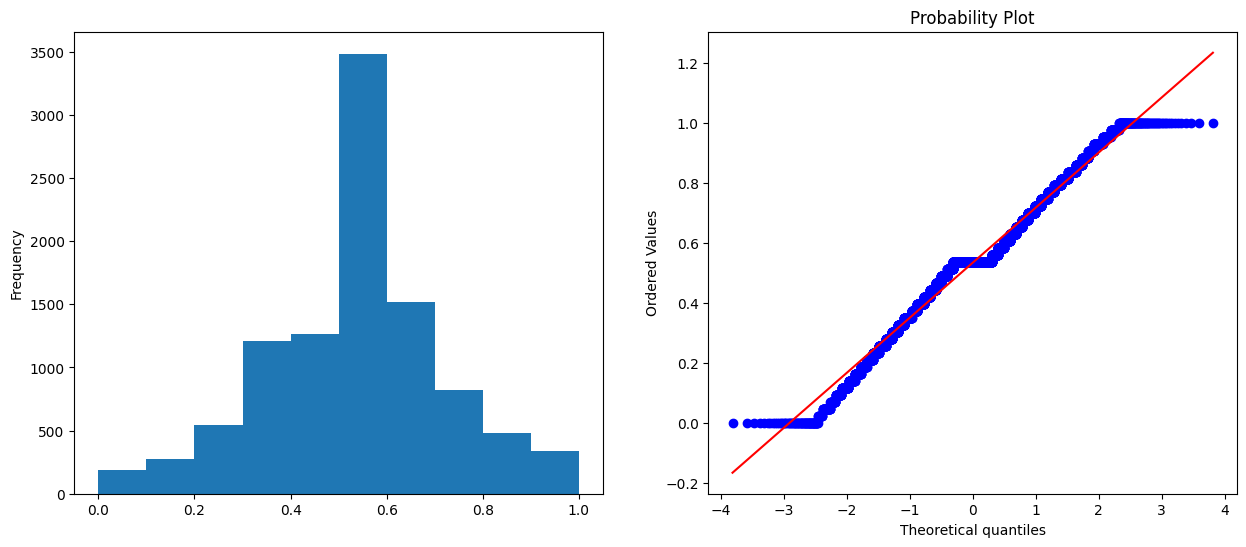

In [2419]:
diagnostic_plots(df,'Months_on_book')
df = IQRdrop(df,'Months_on_book')

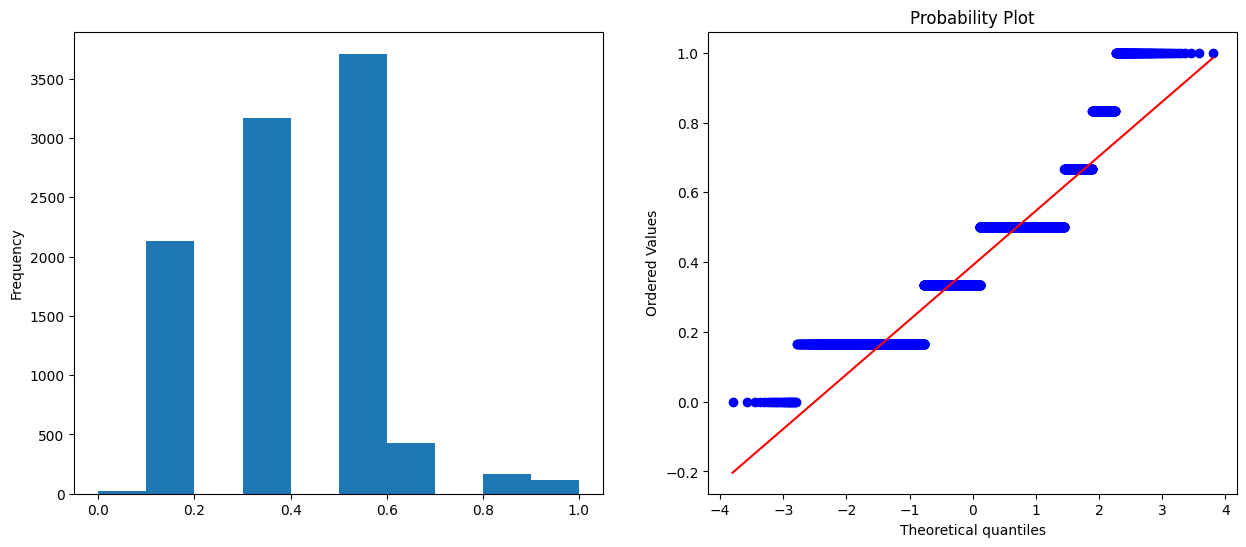

In [2420]:
diagnostic_plots(df,'Months_Inactive_12_mon')

df = IQRdrop(df,'Months_Inactive_12_mon')

In [2421]:
#sns.boxplot(y='Customer_Age', x='Attrition_Flag', data=df)
df = IQRdrop(df,'Months_on_book')
df = IQRdrop(df,'Months_Inactive_12_mon')

<AxesSubplot:xlabel='Customer_Age', ylabel='Total_Trans_Amt'>

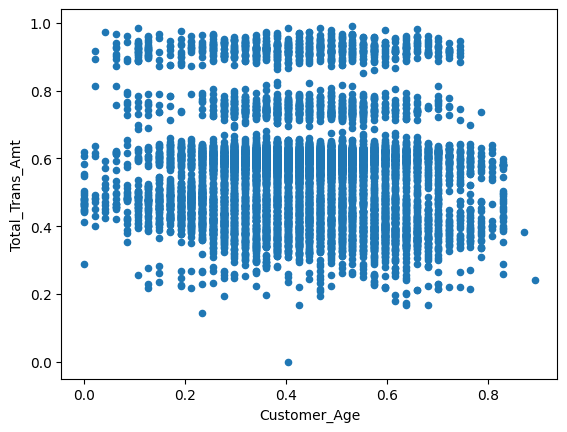

In [2422]:
df.plot.scatter('Customer_Age', 'Total_Trans_Amt')

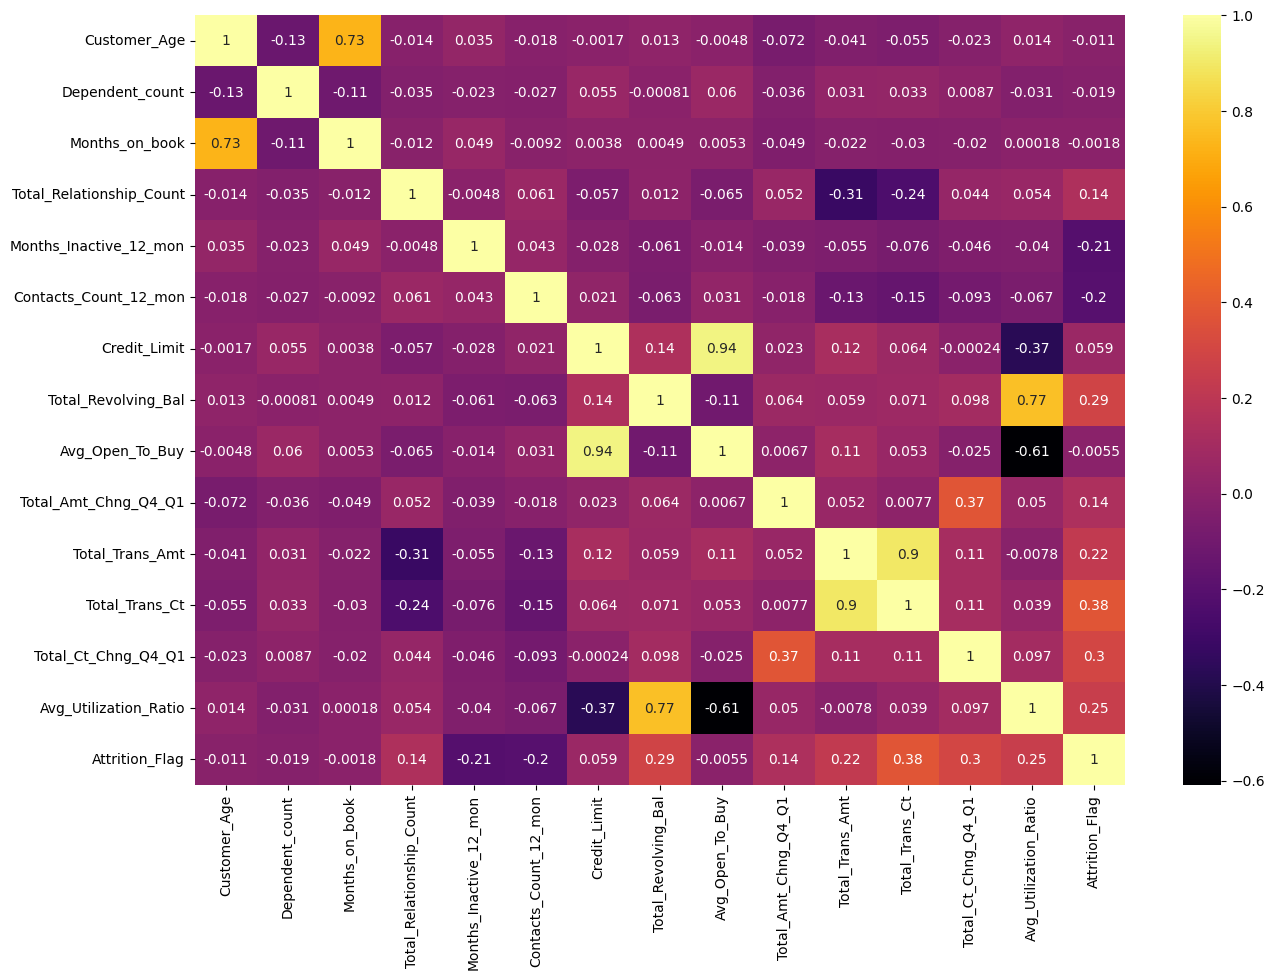

In [2423]:
checkCorrFF(df)

# Preprocessing
### Clearing Unknown and Outliers

In [2424]:
col_names = df.columns
for ind in col_names:
    if df[ind].dtype == 'object':
        print(ind)
        print(df[ind].value_counts())
        print('----------------')

Gender
F    4882
M    4359
Name: Gender, dtype: int64
----------------
Education_Level
Graduate         2842
High School      1839
Unknown          1387
Uneducated       1362
College           922
Post-Graduate     470
Doctorate         419
Name: Education_Level, dtype: int64
----------------
Marital_Status
Married     4296
Single      3562
Divorced     692
Unknown      691
Name: Marital_Status, dtype: int64
----------------
Income_Category
Less than $40K    3192
$40K - $60K       1607
$80K - $120K      1459
$60K - $80K       1300
Unknown            994
$120K +            689
Name: Income_Category, dtype: int64
----------------
Card_Category
Blue        8601
Silver       512
Gold         108
Platinum      20
Name: Card_Category, dtype: int64
----------------


In [2425]:
df.isnull().sum()

Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Attrition_Flag              0
dtype: int64

### Numerical Scaling

### One-hot Encoding

### Feature Dropping

# Benchmark

In [2426]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})
#get the dummy variables for the categorical variables
df = pd.get_dummies(df)

x = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf = LogisticRegression()
clf.fit(x,y)
print("model score: %.8f" % clf.score(x_test, y_test))

ValueError: Input y contains NaN.

c:\program files\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


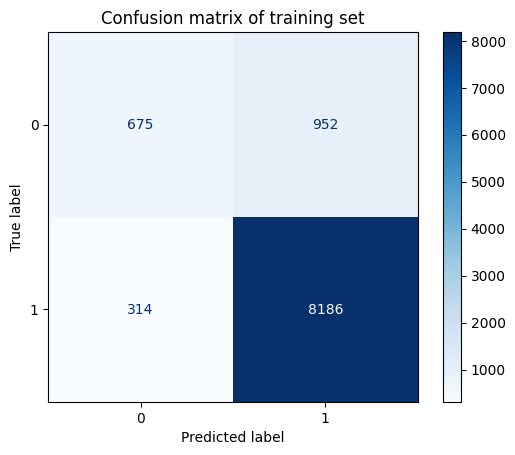

In [ ]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      x,
                      y,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [ ]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf.predict(x)
print("Classification report \n=======================")
print(classification_report(y_true=y, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.68      0.41      0.52      1627
           1       0.90      0.96      0.93      8500

    accuracy                           0.87     10127
   macro avg       0.79      0.69      0.72     10127
weighted avg       0.86      0.87      0.86     10127

Confusion matrix 
[[ 675  952]
 [ 314 8186]]


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Avg_Utilization_Ratio", y="Total_Trans_Ct", title='Months_Inactive_12_mon VS Total_Revolving_Bal')
fig.show()